https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset

### Superheroes

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [104]:
dc_data = pd.read_csv("dc-wikia-data.csv")
marvel_data = pd.read_csv("marvel-wikia-data.csv")

In [5]:
dc_data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [6]:
marvel_data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


Interested Questions:
1. The distribution of gender for the heroes
2. Years of appearance distribution
3. Apperance counts distribution
4. Relation between eye color and ALIGN, and hair color
5. Relation between ALIHN and ALIVE
6. Relation between GSM and Year

### Part 1: Variable Exploration


In [7]:
#size of data
marvel_data.shape

(16376, 13)

In [8]:
marvel_data.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year'],
      dtype='object')

In [9]:
#subset columns in interest
marvel_data = marvel_data[['name','ID','ALIGN','EYE','HAIR','SEX','GSM','ALIVE','APPEARANCES','Year']]

In [10]:
categorical_var = ['ID','ALIGN','EYE','HAIR','SEX','GSM','ALIVE']
numeric_var = ['APPEARANCES','Year']

In [11]:
# summarize missing data
var_summary = marvel_data.isnull().sum(axis = 0)
var_summary = var_summary.to_frame()
var_summary = var_summary.rename(columns={0:"MissingValCount"})
var_summary['MissingValPercentage'] = var_summary.MissingValCount / marvel_data.shape[0]
var_summary['ShouldDrop'] = np.where(var_summary['MissingValPercentage'] >= 0.3, 'drop','')
marvel_data = marvel_data.drop(['EYE','GSM'], axis=1)

In [12]:
marvel_data.head()

,name,ID,ALIGN,HAIR,SEX,ALIVE,APPEARANCES,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Brown Hair,Male Characters,Living Characters,4043.0,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,White Hair,Male Characters,Living Characters,3360.0,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Black Hair,Male Characters,Living Characters,3061.0,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Black Hair,Male Characters,Living Characters,2961.0,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blond Hair,Male Characters,Living Characters,2258.0,1950.0


In [13]:
# practice indexing
# loc
# index row: 
marvel_data.loc[0]
marvel_data.loc[0,'ID'] #select ID column value under first row
marvel_data.loc[1,['name','ID','ALIVE']] #access multiple column values under first row
marvel_data.loc[marvel_data.ID=='Public Identity'].head() # logical selection
marvel_data.loc[marvel_data.HAIR.isin(['White Hair','Black Hair'])].head() # isin 
marvel_data.loc[marvel_data.Year.notnull()].head() #not null values

,name,ID,ALIGN,HAIR,SEX,ALIVE,APPEARANCES,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Brown Hair,Male Characters,Living Characters,4043.0,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,White Hair,Male Characters,Living Characters,3360.0,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Black Hair,Male Characters,Living Characters,3061.0,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Black Hair,Male Characters,Living Characters,2961.0,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blond Hair,Male Characters,Living Characters,2258.0,1950.0


In [14]:
# iloc
#marvel_data.iloc[0] #select first row
#marvel_data.iloc[:,1] #select second column

In [15]:
#manipulate index
marvel_data.set_index("ID").head()

,name,ALIGN,HAIR,SEX,ALIVE,APPEARANCES,Year
ID,,,,,,,
Secret Identity,Spider-Man (Peter Parker),Good Characters,Brown Hair,Male Characters,Living Characters,4043.0,1962.0
Public Identity,Captain America (Steven Rogers),Good Characters,White Hair,Male Characters,Living Characters,3360.0,1941.0
Public Identity,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Black Hair,Male Characters,Living Characters,3061.0,1974.0
Public Identity,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Black Hair,Male Characters,Living Characters,2961.0,1963.0
No Dual Identity,Thor (Thor Odinson),Good Characters,Blond Hair,Male Characters,Living Characters,2258.0,1950.0


In [16]:
row_num = marvel_data.shape[0]

In [17]:
row_num

16376

In [18]:
marvel_data.isnull().sum(axis = 0)

name              0
ID             3770
ALIGN          2812
HAIR           4264
SEX             854
ALIVE             3
APPEARANCES    1096
Year            815
dtype: int64

In [19]:
marvel_data = marvel_data.dropna()

In [20]:
marvel_data.isnull().sum(axis = 0)

name           0
ID             0
ALIGN          0
HAIR           0
SEX            0
ALIVE          0
APPEARANCES    0
Year           0
dtype: int64

In [21]:
marvel_data.ID.value_counts()

Secret Identity                  4019
Public Identity                  2962
No Dual Identity                 1025
Known to Authorities Identity      14
Name: ID, dtype: int64

In [22]:
marvel_data.ALIGN.value_counts()

Bad Characters        3689
Good Characters       2941
Neutral Characters    1390
Name: ALIGN, dtype: int64

In [23]:
marvel_data.HAIR.value_counts()

Black Hair               2557
Brown Hair               1603
Blond Hair               1038
No Hair                   623
Bald                      574
White Hair                519
Red Hair                  410
Grey Hair                 346
Green Hair                 74
Auburn Hair                57
Blue Hair                  38
Strawberry Blond Hair      34
Orange Hair                31
Purple Hair                27
Pink Hair                  22
Variable Hair              18
Yellow Hair                14
Silver Hair                13
Reddish Blond Hair          5
Gold Hair                   5
Light Brown Hair            4
Magenta Hair                4
Orange-brown Hair           2
Bronze Hair                 1
Dyed Hair                   1
Name: HAIR, dtype: int64

In [24]:
marvel_data.SEX.value_counts()

Male Characters           5871
Female Characters         2131
Agender Characters          16
Genderfluid Characters       2
Name: SEX, dtype: int64

In [25]:
marvel_data.ALIVE.value_counts()

Living Characters      5861
Deceased Characters    2159
Name: ALIVE, dtype: int64

In [26]:
# summary function  
marvel_data.Year.describe()

count    8020.000000
mean     1982.752993
std        22.021630
min      1939.000000
25%      1969.000000
50%      1988.000000
75%      2001.000000
max      2013.000000
Name: Year, dtype: float64

In [27]:
marvel_data.APPEARANCES.describe()

count    8020.000000
mean       27.334289
std       130.172312
min         1.000000
25%         1.000000
50%         4.000000
75%        13.000000
max      4043.000000
Name: APPEARANCES, dtype: float64

In [28]:
# summary functions
year_mean = marvel_data.Year.mean()
marvel_data.Year.map(lambda y: y-year_mean).head()

0   -20.752993
1   -41.752993
2    -8.752993
3   -19.752993
4   -32.752993
Name: Year, dtype: float64

In [29]:
marvel_data.groupby("ID").ID.count()

ID
Known to Authorities Identity      14
No Dual Identity                 1025
Public Identity                  2962
Secret Identity                  4019
Name: ID, dtype: int64

In [30]:
marvel_data.groupby("Year").Year.count().sort_values(ascending=False).head()

Year
1993.0    282
1992.0    232
2010.0    225
2011.0    222
1994.0    212
Name: Year, dtype: int64

In [31]:
marvel_data.groupby("ID").APPEARANCES.mean()

ID
Known to Authorities Identity    77.857143
No Dual Identity                 34.851707
Public Identity                  30.878798
Secret Identity                  22.628763
Name: APPEARANCES, dtype: float64

In [32]:
marvel_data.groupby("HAIR").APPEARANCES.mean().sort_values(ascending=False)
marvel_data.groupby("HAIR").APPEARANCES.agg([min,max]).sort_values(by='max',ascending=False)
marvel_data.groupby(["ID","HAIR"]).APPEARANCES.mean().sort_values(ascending=False).head(10)

ID                             HAIR                 
Known to Authorities Identity  No Hair                  348.000000
                               Red Hair                 319.000000
Public Identity                Silver Hair              272.333333
No Dual Identity               Gold Hair                252.000000
Public Identity                Blue Hair                178.750000
Secret Identity                Reddish Blond Hair       113.750000
No Dual Identity               Strawberry Blond Hair    112.666667
Public Identity                Strawberry Blond Hair    107.384615
Secret Identity                Strawberry Blond Hair    105.055556
Public Identity                Auburn Hair               93.814815
Name: APPEARANCES, dtype: float64

In [33]:
marvel_data.Year.dtype

dtype('float64')

In [34]:
#Other functions
# marvel_data.Year.fillna('empty')
# marvel_data.Year.replace('1900','NA')
# marvel_data.Year.astype('int')
# pd.concat(df1,df2)
# left.join(right, on='xxx')
# df1.merge(df2, how='',on='')

### Part 2: Elementary Data Visualization for Marvel dataset

/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Marvel Heroes Appearances Over Year')

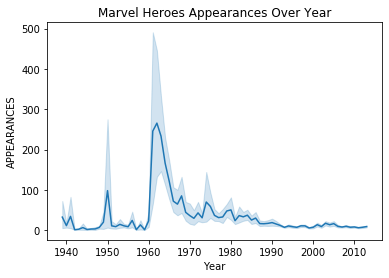

In [42]:
sns.lineplot(x='Year',y='APPEARANCES',data=marvel_data)
plt.title("Marvel Heroes Appearances Over Year")

In [39]:
#print(sns.__version__)

In [38]:
#!conda install -y -c anaconda seaborn=0.9.0

Between 1960 and 1970, the appearances of the characters are really high.

/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


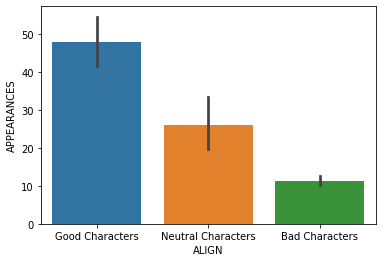

In [131]:
sns.barplot(x="ALIGN",y="APPEARANCES",data=marvel_data)
#sns.barplot(x="ALIGN",y="APPEARANCES",data=dc_data)

/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

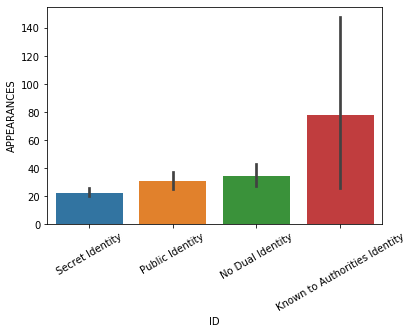

In [55]:
sns.barplot(x="ID",y="APPEARANCES",data=marvel_data)
plt.xticks(rotation=30)

/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

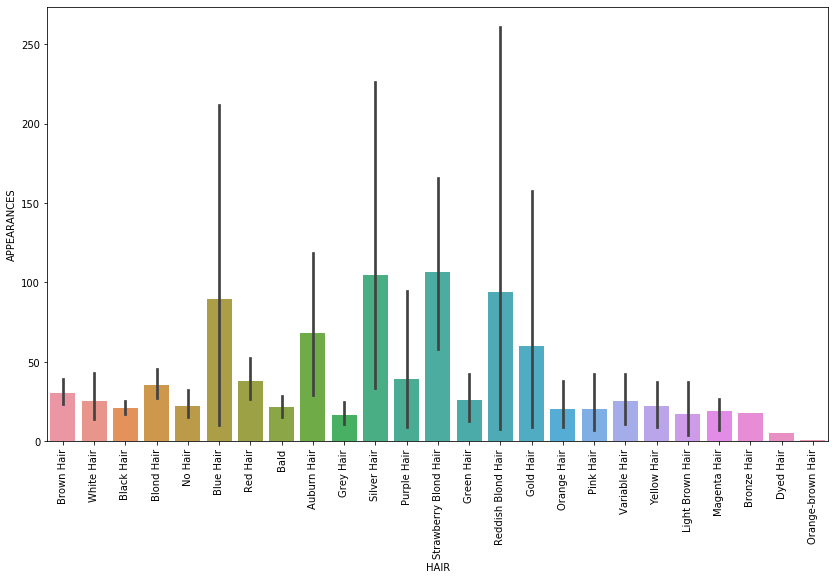

In [54]:
plt.figure(figsize=(14,8))
sns.barplot(x="HAIR",y="APPEARANCES",data=marvel_data)
plt.xticks(rotation=90)

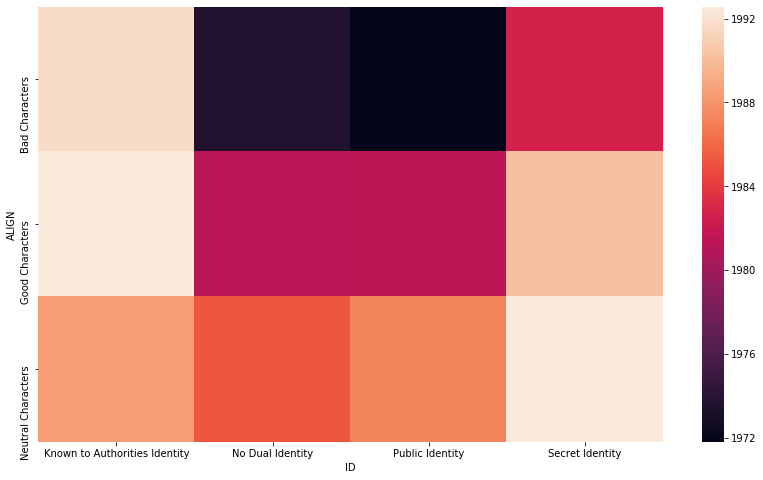

In [72]:
#sns.heatmap(data=marvel_data[["ALIGN","HAIR"]],annot=True)
#marvel_data.isnull().sum()
plt.figure(figsize=(14,8))
heatmap1_data = pd.pivot_table(marvel_data, values='Year', 
                     index=['ALIGN'], 
                     columns='ID')
sns.heatmap(heatmap1_data)

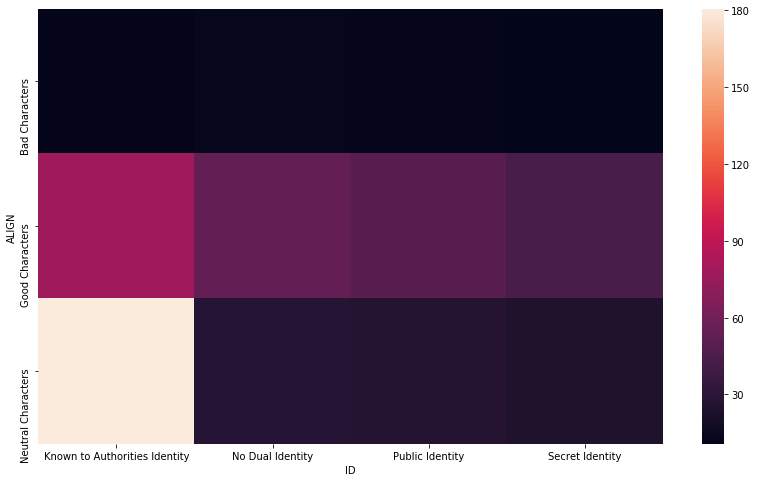

In [73]:
plt.figure(figsize=(14,8))
heatmap1_data = pd.pivot_table(marvel_data, values='APPEARANCES', 
                     index=['ALIGN'], 
                     columns='ID')
sns.heatmap(heatmap1_data)

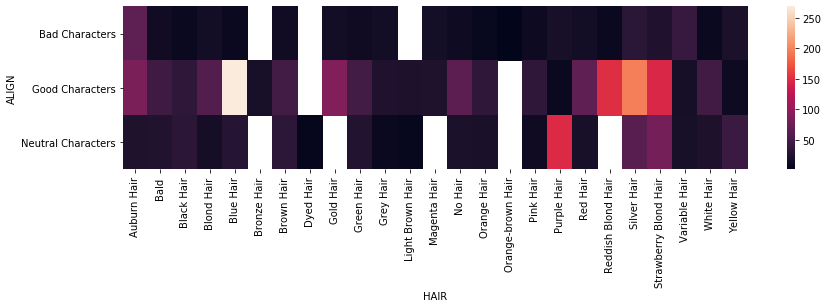

In [77]:
plt.figure(figsize=(14,3))
heatmap1_data = pd.pivot_table(marvel_data, values='APPEARANCES', 
                     index=['ALIGN'], 
                     columns='HAIR')
sns.heatmap(heatmap1_data)

/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


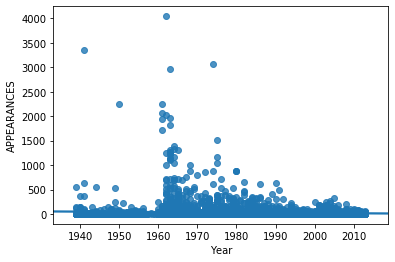

In [79]:
sns.regplot(x=marvel_data['Year'], y=marvel_data['APPEARANCES'])

/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/yangyangdai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional i

<Figure size 1008x288 with 0 Axes>

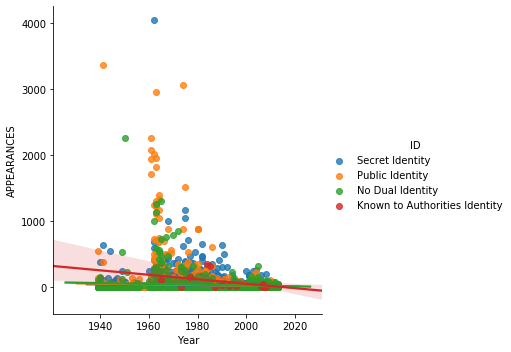

In [82]:
plt.figure(figsize=(14,4))
sns.lmplot(x="Year", y="APPEARANCES", hue="ID", data=marvel_data)

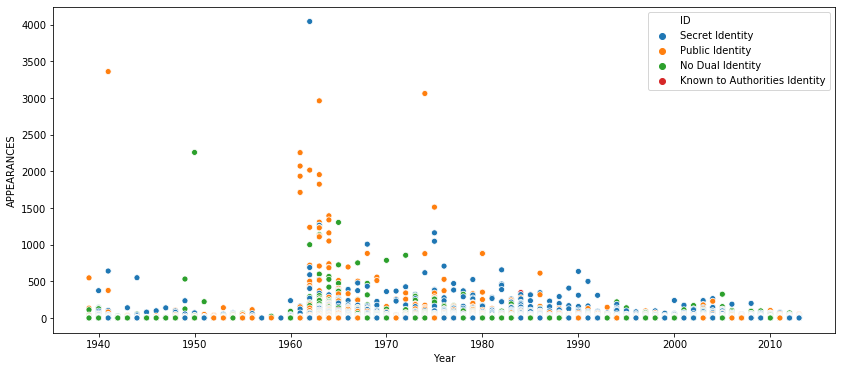

In [86]:
plt.figure(figsize=(14,6))
sns.scatterplot(x="Year", y="APPEARANCES", hue="ID", data=marvel_data)

In [ ]:
# sns.swarmplot(x=marvel_data['ID'],
#               y=marvel_data['APPEARANCES'])

In [95]:
# Histograms for each species
#sns.distplot(a=marvel_data['APPEARANCES'], label="Known to Authorities Identity", kde=False)
#sns.distplot(a=marvel_data['APPEARANCES'], label="No Dual Identity", kde=False)
#sns.distplot(a=marvel_data['APPEARANCES'], label="Iris-virginica", kde=False)
# Known to Authorities Identity      14
# No Dual Identity                 1025
# Public Identity                  2962
# Secret Identity                  

In [96]:
dc_data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [98]:
dc_data.isnull().sum()/dc_data.shape[0]

page_id             0.000000
name                0.000000
urlslug             0.000000
ID                  0.291908
ALIGN               0.087152
EYE                 0.526102
HAIR                0.329756
SEX                 0.018126
GSM                 0.990719
ALIVE               0.000435
APPEARANCES         0.051479
FIRST APPEARANCE    0.010006
YEAR                0.010006
dtype: float64

In [105]:
dc_data = dc_data.drop(["EYE","HAIR","GSM","page_id","urlslug"],axis=1)

In [108]:
dc_data = dc_data.drop(["FIRST APPEARANCE"],axis=1)

In [110]:
dc_data["DC Flag"] = 1

In [112]:
marvel_data["Marvel Flag"] = 1

In [121]:
dc_data = dc_data.dropna()

In [127]:
marvel_data = marvel_data.rename(columns={"Year":"YEAR"})

In [128]:
heroes = pd.concat([marvel_data,dc_data])

Text(0.5, 1.0, 'DC - Characters and their appearances')

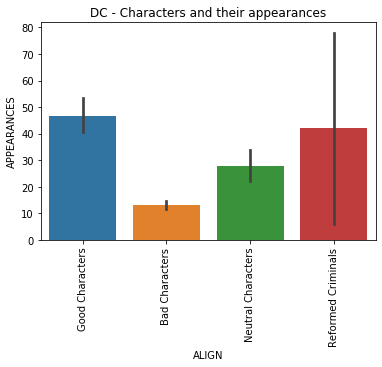

In [140]:
sns.barplot(x="ALIGN",y="APPEARANCES",data=dc_data)
plt.xticks(rotation=90)
plt.title("DC - Characters and their appearances")

[Text(0.5, 1.0, 'DC ID')]

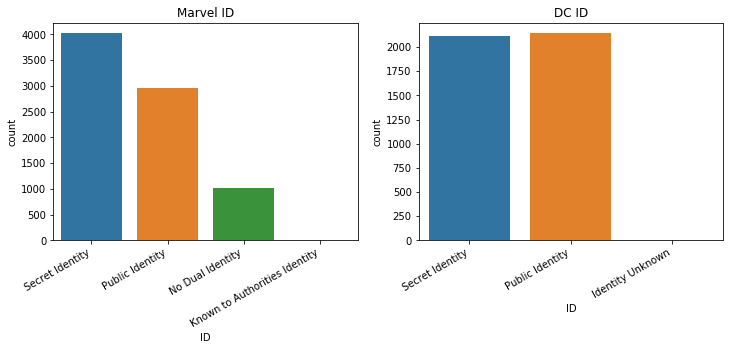

In [174]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(x="ID",data=marvel_data,ax=ax1)
sns.countplot(x="ID",data=dc_data,ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')
ax1.set(title="Marvel ID")
ax2.set(title="DC ID")